# Tratamento do Dataset

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [ ]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

In [ ]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

#### correção: 'milage' -> INT

In [ ]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [ ]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [ ]:
data.describe()

#### NULL's

In [ ]:
data.isnull().sum()

#### counts

In [ ]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].nunique() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
# data['ext_col'].value_counts()# 11 -> nao se sabe
# data['int_col'].value_counts() # 98 -> nao se sabe
# for preco in data['price']: # tudo certo
#     if not isinstance(preco, int):
#         print('erro')

In [ ]:
len(data['milage'])
# len(data['milage'].unique())

##### --> nº de velocidades na transmissão existentes no dataset

In [ ]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

#### verificar significado de '-' e NaN para o tipo de combustível

In [ ]:
len(data.loc[data['fuel_type'] == '–'])

In [ ]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [ ]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

In [ ]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [ ]:
data[data['model_year']<1990] # outlier do 1º gráfico

In [ ]:
data[data['milage']>350000] # outlier do 2º gráfico

In [ ]:
data[data['price']>1500000] # outlier 3º gráfico

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [ ]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

#### LINEPLOT

In [ ]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [ ]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

# [ENGINE] novos atributos 

In [ ]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [ ]:
data.info()

In [ ]:
data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [ ]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [ ]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

In [ ]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

In [ ]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [ ]:
#sorted(data['Potencia'].unique())

# verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [ ]:
data.loc[data['brand'] == 'Maybach'].head()

In [ ]:
data.to_csv('train_ccols.csv', index=False)

# [SUBSETS] com dataset W/ ENGINE caract-

In [ ]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [ ]:
p.info()

In [ ]:
p.columns

In [ ]:
print(p.duplicated().sum())

### Substituir pela mediana :
- num valvulas
- num cilindros
- potencia
- capacidade_motor

In [ ]:
m = p['Numero_Valvulas'].median()
m2 = p['Numero_Cilindros'].median()
m3 = p['Potencia'].median()
m4 = p['Capacidade_Motor'].median()

p['Numero_Valvulas'].fillna(m, inplace=True)
p['Numero_Cilindros'].fillna(m2, inplace=True)
p['Potencia'].fillna(m3, inplace=True)
p['Capacidade_Motor'].fillna(m4, inplace=True)

#### Clean title

In [ ]:
p['clean_title'] = p['clean_title'].fillna('No')

### novos atributos (derivações)

In [ ]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

#### T2

In [ ]:
# import numpy as np
p['T2'] = p['transmission'].str.extract(r'(\d+)')
p['T2'] = pd.to_numeric(p['T2'], errors='coerce')
m5 = p['T2'].mean() 
p['T2'].fillna(round(m5), inplace=True)
#p.head()
#p['T2'].isnull().sum()
# p['T2'].unique()

#### Categoria ET (engine + transmission)

In [ ]:
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
sse = []

for k in range(2,20):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


# visualizar resultados
plt.plot(range(2,20), sse)
plt.xticks(range(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Squared Error")
plt.title("Método do Joelho")
plt.grid()
plt.show()
plt.close()

In [ ]:
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
silhouette = []

for k in range(2, 20):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    clusters = kmeans.fit_predict(X)
    ss = silhouette_score(X, clusters)
    silhouette.append(ss)

# visualize results
plt.plot(range(2, 20), silhouette)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette")
plt.grid()
plt.show()
plt.close()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 4

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionar uma nova coluna 'Categoria' ao DataFrame com base nos clusters
p['Categoria_ET'] = kmeans.labels_
p['Categoria_ET'] = p['Categoria_ET'].astype('category')

In [ ]:
p.info()

#### categoria Marca

In [ ]:
frequencias = p['brand'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Marca'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Marca'
    else:
        return 'Média Frequência Marca'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Marca'] = p['brand'].map(frequencias.apply(categorizar))

p['Categoria_Marca'] = p['Categoria_Marca'].astype('category')
p['Categoria_Marca'].value_counts()

#### Categoria Modelo

In [ ]:
frequencias = p['model'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Modelo'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Modelo'
    else:
        return 'Média Frequência Modelo'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Modelo'] = p['model'].map(frequencias.apply(categorizar))
p['Categoria_Modelo'] = p['Categoria_Modelo'].astype('category')
p['Categoria_Modelo'].value_counts()
p['Categoria_Modelo'].unique()

# normalidade das novas colunas (numéricas)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Lista das colunas numéricas que você deseja analisar
colunas_numericas = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas', 'T2']

num_colunas = len(colunas_numericas)
fig, axs = plt.subplots(2, num_colunas, figsize=(15, 8))
print(f'Teste de Shapiro-Wilk: \n')

# Iterar sobre as colunas numéricas e plotar os gráficos em cada subplot
for i, coluna in enumerate(colunas_numericas):
    # Histograma
    sns.histplot(p[coluna], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'{coluna}')
    
    # Gráfico QQ
    stats.probplot(p[coluna], dist="norm", plot=axs[1, i])
    axs[1, i].set_title(f'QQ-plot')
 
    # Teste de Shapiro-Wilk
    stat, pv = stats.shapiro(p[coluna])
    print(f'{coluna}:')
    print(f'Valor p: {pv}')
    if pv > 0.05:
        print('Não podemos rejeitar a hipótese nula - A distribuição parece normal.')
    else:
        print('Rejeita-se a hipótese nula -> a distribuição não segue o modelo normal.')
    
plt.tight_layout()
plt.show()

como se pode observar, nenhum dos novos atributos (numéricos possuem distribuição normal)

In [ ]:
correlation_matrix_spearman = df.corr(method='spearman')
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm')
plt.show()

# subset 1

- Substituição de valores nulos e '-' PELA MODA
- Remoção outliers LOF
- Variavies cat -> numerica

In [ ]:
data1 = p

In [ ]:
data1.describe()

In [ ]:
data1.info()

In [ ]:
data1.head()

### NULL's substitution

In [ ]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]

data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod1, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

mod7=data1['transmission'].mode()[0]
data1['transmission'] = data1['transmission'].replace('–', mod6)

#### Categoria cor interna

In [ ]:
frequencias = data1['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_IntCol'] = data1['int_col'].map(frequencias.apply(categorizar))
data1['Categoria_IntCol'] = data1['Categoria_IntCol'].astype('category')
data1['Categoria_IntCol'].value_counts()

In [ ]:
data1['ext_col'].unique()

##### Categoria cor externa

In [ ]:
frequencias = data1['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_ExtCol'] = data1['ext_col'].map(frequencias.apply(categorizar))
data1['Categoria_ExtCol'] = data1['Categoria_ExtCol'].astype('category')
data1['Categoria_ExtCol'].value_counts()
data1['Categoria_ExtCol'].unique()

In [ ]:
p.info()

## Correlações

In [ ]:
p=subset_1_s_out

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = p.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)


In [ ]:
#va's categóricas
categorical_columns = p.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(p[column], p['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

## Outlier por IQR -> va. Numéricas

In [ ]:
outlier_indices_dict = {}

# Variáveis Numéricas
for column in data1.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data1[column].quantile(0.25)
    Q3 = data1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data1[column] > Q1 - 1.5*IQR) & (data1[column] < Q3 + 1.5*IQR))

    outlier_indices_dict[column] = data1.loc[~outlier_conditional].index
    
    num_outliers = len(data1[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

###### O número de válvulas têm muito pouca correlação com o preço -> N utiliza-se essa coluna para os cenários!
###### Remove-se os 6 registros da capacidade do motor e os 57 com num de cilindros e 376 do T2


##### Remover registros com outliers (cujo correlação baixa com preço)

In [ ]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data1_s_out = data1.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data1_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data1_s_out))

In [ ]:
data1.to_csv('subset_1.csv', index=False) # sem normalizar com outliers
data1_s_out.to_csv('subset_1_s_out.csv', index=False) # sem normalizar sem outliers

# subset 2

### transf

-  substituir '-' por desconhecido
- Remoção outliers LOF
- Variavies cat -> numerica

In [ ]:
data2=p

In [ ]:
p.columns

#### NULL's substitution

#### Fuel Type

In [ ]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

#### accident + engine + transmission + ex_col + int_col

In [ ]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


#### Categoria cor interna

In [ ]:
frequencias = data2['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência int_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência int_col'
    else:
        return 'Média Frequência int_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_IntCol'] = data2['int_col'].map(frequencias.apply(categorizar))
data2['Categoria_IntCol'] = data2['Categoria_IntCol'].astype('category')
data2['Categoria_IntCol'].value_counts()

#### Categoria cor externa

In [ ]:
frequencias = data2['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    else:
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_ExtCol'] = data2['ext_col'].map(frequencias.apply(categorizar))
data2['Categoria_ExtCol'] = data2['Categoria_ExtCol'].astype('category')
data2['Categoria_ExtCol'].value_counts()

## correlações

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = subset_1_s_out.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)

In [ ]:
#va categorica
categorical_columns = subset_1_s_out.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(subset_1_s_out[column], subset_1_s_out['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

## Outlier por IQR -> va.'s Numéricas

In [ ]:
# Variáveis Numéricas
for column in data2.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data2[column].quantile(0.25)
    Q3 = data2[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data2[column] > Q1 - 1.5*IQR) & (data2[column] < Q3 + 1.5*IQR))
    outlier_indices_dict[column] = data2.loc[~outlier_conditional].index
    
    num_outliers = len(data2[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

##### Remover registros com outliers (cuja correlação baixa com preço)

In [ ]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data2_s_out = data2.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data2_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data2_s_out))

In [ ]:
data2.to_csv('subset_2.csv', index=False) # sem normalizar com outliers
data2_s_out.to_csv('subset_2_s_out.csv', index=False) # sem normalizar sem outliers

In [ ]:
data2.info()

# MODELAÇÃO
### Como subset 1 é muito parecido com subset 2, só vamos utilizar o subset 1

In [66]:
import pandas as pd
subset_1=pd.read_csv('subset_1.csv')
subset_1_s_out=pd.read_csv('subset_1_s_out.csv')
pd.set_option('display.max_rows', None)

# Cenários

## Cenário 1

### com outliers

In [80]:
X1 = subset_1[['brand','model','model_year','milage','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title']]
y1 = subset_1['price'] 

#### label logaritmizada (preço) + normalização

### sem outliers

In [81]:
X1out = subset_1_s_out[['brand','model','model_year','milage','fuel_type','engine','ext_col','int_col','accident','clean_title']] # tinha T2 » retirei...
y1out = subset_1_s_out['price'] 

## Cenário 2

#### com outliers

In [82]:
X2 = subset_1[['model_year', 'milage', 'fuel_type', 'accident', 'clean_title', 'Categoria_ET', 'Categoria_Marca', 'Categoria_Modelo', 'Categoria_IntCol', 'Categoria_ExtCol']]
y2 = subset_1['price'] 

#### sem outlier

In [83]:
X2out = subset_1_s_out[['model_year','milage','fuel_type','accident','clean_title','Categoria_ET','Categoria_Marca','Categoria_Modelo','Categoria_IntCol','Categoria_ExtCol']]  
y2out = subset_1_s_out['price'] 

## Cenário 3

#### com outliers

In [84]:
X3=subset_1[['Potencia','Capacidade_Motor','Numero_Cilindros','T2','model_year', 'milage']]
y3=subset_1['price']

#### sem outlier

In [85]:
X3out = subset_1_s_out[['Potencia','Capacidade_Motor','Numero_Cilindros','T2','model_year', 'milage', 'Numero_Valvulas']] 
y3out = subset_1_s_out['price']

## Cenário 4

#### com outliers

In [86]:
X4=subset_1[['brand','model','model_year','milage','fuel_type','ext_col','int_col','accident','clean_title']]
y4=subset_1['price']

#### sem outliers

In [87]:
X4out = subset_1_s_out[['brand','model','model_year','milage','fuel_type','ext_col','int_col','accident','clean_title']]
y4out = subset_1_s_out['price']

## Cenário Extra

#### criação de relações entre atributos existentes

In [88]:
p=subset_1_s_out

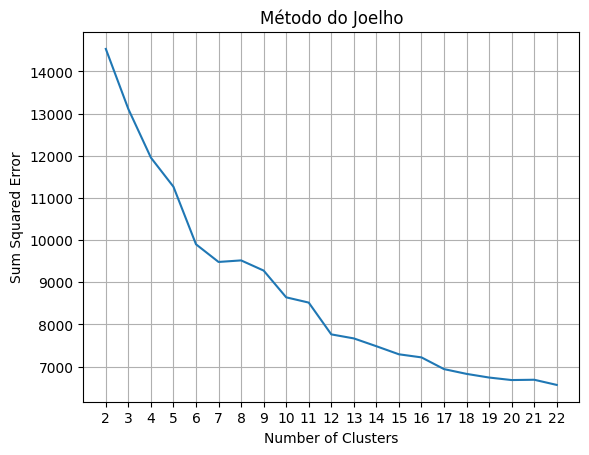

In [89]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['brand', 'model']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Apply the preprocessor to the data
X_preprocessed = preprocessor.fit_transform(p[v_catg + v_num])

sse = []

for k in range(2, 23):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X_preprocessed)
    sse.append(kmeans.inertia_)


# visualizar resultados
plt.plot(range(2, 23), sse)
plt.xticks(range(2, 23))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Squared Error")
plt.title("Método do Joelho")
plt.grid()
plt.show()
plt.close()

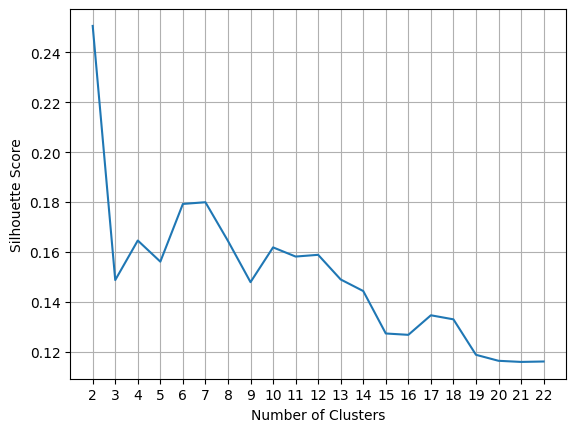

In [90]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['brand', 'model']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Apply the preprocessor to the data
X_preprocessed = preprocessor.fit_transform(p[v_catg + v_num])

silhouette = []

for k in range(2, 23):
    kmeans = KMeans(n_clusters=k, random_state=12345)
    clusters = kmeans.fit_predict(X_preprocessed)
    ss = silhouette_score(X_preprocessed, clusters)
    silhouette.append(ss)

# Visualize the results
plt.plot(range(2, 23), silhouette)
plt.xticks(range(2, 23))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

In [91]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['brand', 'model']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, v_catg),
        ('num', StandardScaler(), v_num)
    ])

X = p[v_catg + v_num]
X_preprocessed = preprocessor.fit_transform(X)
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

p['Categoria_MarcaModelo'] = kmeans.labels_
p['Categoria_MarcaModelo'] = p['Categoria_MarcaModelo'].astype('category')

In [92]:
def condicao_do_veiculo(row):
    if row['accident'] == 'At least 1 accident or damage reported' and row['clean_title'] == 'No':
        return 'mau'
    elif row['accident'] == 'None reported' and row['clean_title'] == 'Yes':
        return 'bom'
    else:
        return 'avg'

p['condicao_do_veiculo'] = p.apply(condicao_do_veiculo, axis=1)

popularidade_do_modelo = p['model'].value_counts().to_dict()
p['popularidade_modelo'] = p['model'].map(popularidade_do_modelo)
popularidade_da_marca= p['brand'].value_counts().to_dict()
p['popularidade_marca'] = p['brand'].map(popularidade_da_marca)
p['eficiencia'] = p['Potencia'] / p['Capacidade_Motor']

In [93]:
p.to_csv('subset_1_s_out.csv', index=False) # sem normalizar com outliers

#### cenário extra

In [94]:
# XX=subset_1_s_out[['Potencia','Capacidade_Motor','Numero_Cilindros','T2','model_year', 
#                    'brand','model','milage','fuel_type','ext_col','int_col','accident',
#                    'clean_title','eficiencia', 'Categoria_MarcaModelo']]
t=subset_1_s_out[['model_year', 'milage', 
       'Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'T2', 'Categoria_Marca',
       'Categoria_Modelo', 'Categoria_IntCol', 'Categoria_ExtCol',
       'Categoria_MarcaModelo', 'popularidade_modelo',
       'popularidade_marca', 'eficiencia', 'idade_quilometragem', 'cc']]
yy=subset_1_s_out['price']

# Testing

In [67]:
p=subset_1_s_out

In [68]:
subset_1_s_out.info()
# p['Categoria_MarcaModelo'] = p['Categoria_MarcaModelo'].astype('category')
# p['cc'] = p['cc'].astype('category')
# p['Categoria_ET'] = p['Categoria_ET'].astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  2771 non-null   object 
 1   model                  2771 non-null   object 
 2   model_year             2771 non-null   int64  
 3   milage                 2771 non-null   int64  
 4   fuel_type              2771 non-null   object 
 5   engine                 2771 non-null   object 
 6   transmission           2771 non-null   object 
 7   ext_col                2771 non-null   object 
 8   int_col                2771 non-null   object 
 9   accident               2771 non-null   object 
 10  clean_title            2771 non-null   object 
 11  price                  2771 non-null   int64  
 12  Potencia               2771 non-null   float64
 13  Capacidade_Motor       2771 non-null   float64
 14  Numero_Cilindros       2771 non-null   float64
 15  Nume

In [69]:
# def condicao_do_veiculo(row):
#     if row['accident'] == 'At least 1 accident or damage reported' and row['clean_title'] == 'No':
#         return 'mau'
#     elif row['accident'] == 'None reported' and row['clean_title'] == 'Yes':
#         return 'bom'
#     else:
#         return 'avg'

# p['condicao_do_veiculo'] = p.apply(condicao_do_veiculo, axis=1)

# popularidade_do_modelo = p['model'].value_counts().to_dict()
# p['popularidade_modelo'] = p['model'].map(popularidade_do_modelo)
# popularidade_da_marca= p['brand'].value_counts().to_dict()
# p['popularidade_marca'] = p['brand'].map(popularidade_da_marca)

# p['eficiencia'] = p['Potencia'] / p['Capacidade_Motor']
p['idade_carro'] = 2024 - (p['model_year']+1e-10)

p['idade_quilometragem'] = p['idade_carro'] * p['milage']
p['km_por_ano'] = p['milage'] / p['idade_carro']

### kmeans cc

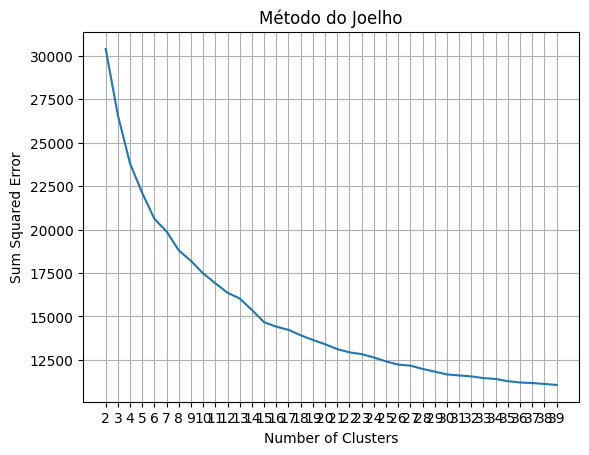

In [70]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['accident', 'clean_title', 'condicao_do_veiculo', 'brand', 'model']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'eficiencia',
         'idade_carro', 'idade_quilometragem', 'km_por_ano', 'milage' ]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Apply the preprocessor to the data
X_preprocessed = preprocessor.fit_transform(p[v_catg + v_num])

sse = []

for k in range(2, 40):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X_preprocessed)
    sse.append(kmeans.inertia_)


# visualizar resultados
plt.plot(range(2, 40), sse)
plt.xticks(range(2, 40))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Squared Error")
plt.title("Método do Joelho")
plt.grid()
plt.show()
plt.close()

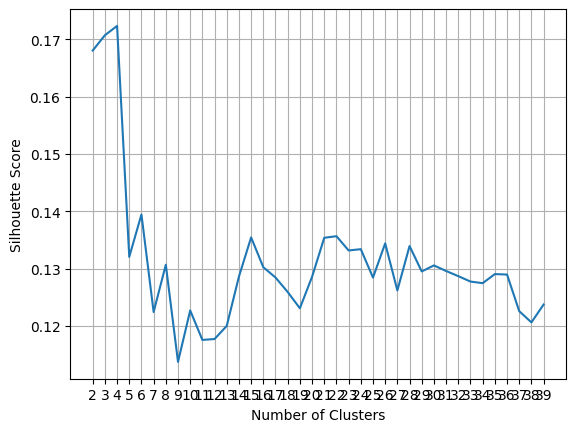

In [71]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['accident', 'clean_title', 'condicao_do_veiculo', 'brand', 'model']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'eficiencia',
         'idade_carro', 'idade_quilometragem', 'km_por_ano', 'milage']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Apply the preprocessor to the data
X_preprocessed = preprocessor.fit_transform(p[v_catg + v_num])

silhouette = []

for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, random_state=12345)
    clusters = kmeans.fit_predict(X_preprocessed)
    ss = silhouette_score(X_preprocessed, clusters)
    silhouette.append(ss)

# Visualize the results
plt.plot(range(2, 40), silhouette)
plt.xticks(range(2, 40))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

In [72]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['accident', 'clean_title', 'condicao_do_veiculo']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'eficiencia',
         'idade_carro', 'idade_quilometragem', 'km_por_ano', 'milage']

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, v_catg),
        ('num', StandardScaler(), v_num)
    ])

X = p[v_catg + v_num]
X_preprocessed = preprocessor.fit_transform(X)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

p['cc'] = kmeans.labels_
p['cc'] = p['cc'].astype('category')

### kmeans p/ var "categorias"

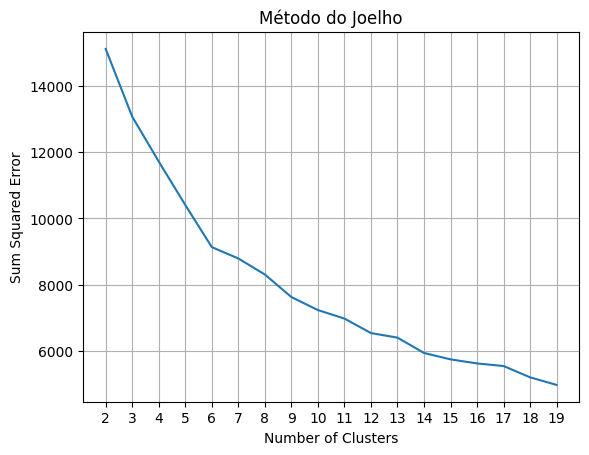

In [73]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['model']
v_num=['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'eficiencia']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Apply the preprocessor to the data
X_preprocessed = preprocessor.fit_transform(p[v_catg + v_num])

sse = []

for k in range(2, 20):

    kmeans = KMeans(n_clusters=k, random_state=12345)
    kmeans.fit(X_preprocessed)
    sse.append(kmeans.inertia_)


# visualizar resultados
plt.plot(range(2, 20), sse)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Squared Error")
plt.title("Método do Joelho")
plt.grid()
plt.show()
plt.close()

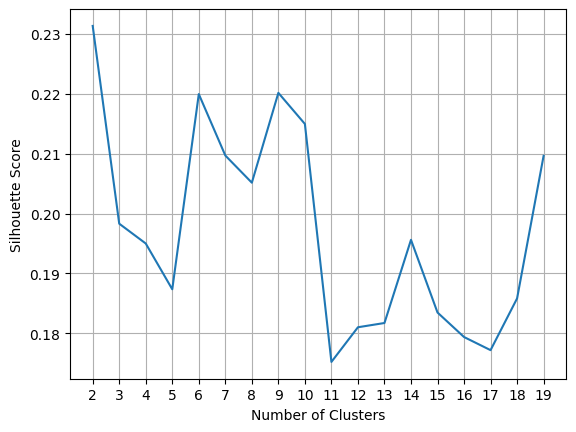

In [74]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['model']
v_num=['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'eficiencia']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Apply the preprocessor to the data
X_preprocessed = preprocessor.fit_transform(p[v_catg + v_num])

silhouette = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=12345)
    clusters = kmeans.fit_predict(X_preprocessed)
    ss = silhouette_score(X_preprocessed, clusters)
    silhouette.append(ss)

# Visualize the results
plt.plot(range(2, 20), silhouette)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### kmeans int_col

In [75]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['int_col']
v_num=['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'eficiencia']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, v_catg),
        ('num', StandardScaler(), v_num)
    ])

X = p[v_catg + v_num]
X_preprocessed = preprocessor.fit_transform(X)
n_clusters = 18
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

p['Categoria_IntCol'] = kmeans.labels_
p['Categoria_IntCol'] = p['Categoria_IntCol'].astype('category')

### kmeans ext_col

In [76]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['ext_col']
v_num=['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'eficiencia']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, v_catg),
        ('num', StandardScaler(), v_num)
    ])

X = p[v_catg + v_num]
X_preprocessed = preprocessor.fit_transform(X)
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

p['Categoria_ExtCol'] = kmeans.labels_
p['Categoria_ExtCol'] = p['Categoria_ExtCol'].astype('category')

### kmeans brand

In [77]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['brand']
v_num=['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'eficiencia' ]
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, v_catg),
        ('num', StandardScaler(), v_num)
    ])

X = p[v_catg + v_num]
X_preprocessed = preprocessor.fit_transform(X)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

p['Categoria_Marca'] = kmeans.labels_
p['Categoria_Marca'] = p['Categoria_Marca'].astype('category')

### kmeans model

In [78]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

v_catg = ['model']
v_num=['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2', 'eficiencia']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, v_catg),
        ('num', StandardScaler(), v_num)
    ])

X = p[v_catg + v_num]
X_preprocessed = preprocessor.fit_transform(X)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

p['Categoria_Modelo'] = kmeans.labels_
p['Categoria_Modelo'] = p['Categoria_Modelo'].astype('category')

In [79]:
p.to_csv('subset_1_s_out.csv', index=False) # sem normalizar com outliers

# previsões (regressão)

In [ ]:
subset_1_s_out.columns

In [ ]:
subset_1_s_out.head(5)

### Separar Data / Treinar e Avaliar Algoritmos

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
from slickml.metrics import (
    RegressionMetrics,
)  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
import shap

### cross validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
)

# Definir o número de folds para a cross-validation
kf = KFold(n_splits=11, shuffle=True, random_state=42)

# Função para calcular Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Função para calcular REC AUC
def rec_auc(y_true, y_pred):
    # Calcula o erro normalizado
    error = np.abs(y_true - y_pred) / np.abs(y_true)
    # Ordena os erros
    sorted_error = np.sort(error)
    # Frequência cumulativa relativa
    cumulative_freq = np.arange(1, len(sorted_error) + 1) / len(sorted_error)
    # Calcula a AUC utilizando a regra do trapezoide
    return np.trapz(cumulative_freq, sorted_error)

def calculate_rec_curve(y_true, y_pred):
    # Calcula o erro normalizado
    error = np.abs(y_true - y_pred) / np.abs(y_true)
    # Ordena os erros
    sorted_error = np.sort(error)
    # Frequência cumulativa relativa
    cumulative_freq = np.arange(1, len(sorted_error) + 1) / len(sorted_error)
    return sorted_error, cumulative_freq

# Função para calcular Coefficient of Variation
def coefficient_of_variation(y_true, y_pred):
    return np.std(y_pred) / np.mean(y_pred)

# Função para calcular Mean of Variation
def mean_of_variation(y_true, y_pred):
    return np.mean(y_pred) / np.mean(y_true)

def plot_rec_curves(curves):
    plt.figure(figsize=(10, 6))
    
    for model_id, (sorted_error, cumulative_freq) in curves.items():
        if model_id == 1:
            label = 'Regressão Linear'
        elif model_id == 2:
            label = 'Random Forest'
        elif model_id ==3:
            label='Ada Boost'
        elif model_id==4:
            label='Decision Tree'
        else: label='Neural Net'

        plt.plot(sorted_error, cumulative_freq, label=label)
        
    
    plt.xlabel('Relative Error')
    plt.ylabel('Cumulative Frequency')
    plt.title('Curva REC')
    plt.legend()
    plt.grid(True)
    plt.show()

### modelo

In [ ]:
from sklearn.metrics import roc_curve, auc

def modelo (n,X,y):
    # Listas para armazenar os resultados da validação cruzada
    cv_r2_scores = []
    cv_ev_scores = []
    cv_mae_scores = []
    cv_mse_scores = []
    cv_msle_scores = []
    cv_mape_scores = []
    cv_rec_auc_scores = []
    cv_coeff_var_scores = []
    cv_mean_var_scores = []
    c={}

    for train_index, test_index in kf.split(X):
        # Dividir dados em treino e teste
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        features_num=X.select_dtypes(include=['int64','float64']).columns.tolist()
        features_cat=X.select_dtypes(include=['object','category']).columns.tolist()

        preprocessor = make_column_transformer(
            (StandardScaler(), features_num),
            (OneHotEncoder(handle_unknown="ignore"), features_cat),
            )
        
        # Aplicar preprocessamento
        X_train_norm = preprocessor.fit_transform(X_train)
        X_test_norm = preprocessor.transform(X_test)
        
        # Logaritmizar
        y_train_log = np.log(y_train)
        y_test_log = np.log(y_test)
         
        if n==1:
            model=regressao_linear(X_train_norm,y_train_log)
        elif n==2:
            model=random_forest(X_train_norm,y_train_log)
        elif n==3:
            model=ada_boost(X_train_norm,y_train_log)
        elif n==4:
            model=decison_tree(X_train_norm,y_train_log)
        else:
            model=rn(X_train_norm,y_train_log,X_test_norm,y_test_log)
            
        if n == 5:
            pred_log = model.predict(X_test_norm).flatten()
        else:
            pred_log = model.predict(X_test_norm)
            
        pred_orig_scale = np.exp(pred_log)

        sorted_error, cumulative_freq = calculate_rec_curve(y_test, pred_orig_scale)
        c[n] = (sorted_error, cumulative_freq)
        
        # Calcular as métricas
        r2 = r2_score(np.exp(y_test_log), pred_orig_scale)
        ev = explained_variance_score(np.exp(y_test_log), pred_orig_scale)
        mae = mean_absolute_error(np.exp(y_test_log), pred_orig_scale)
        mse = mean_squared_error(np.exp(y_test_log), pred_orig_scale)
        msle = mean_squared_log_error(np.exp(y_test_log), pred_orig_scale)
        mape = mean_absolute_percentage_error(np.exp(y_test_log), pred_orig_scale)
        rec_auc_value = rec_auc(np.exp(y_test_log), pred_orig_scale)
        #rec_curve = calculate_rec_curve(np.exp(y_test_log), pred_orig_scale)
        coeff_var = coefficient_of_variation(np.exp(y_test_log), pred_orig_scale)
        mean_var = mean_of_variation(np.exp(y_test_log), pred_orig_scale)

        # Armazenar as métricas
        cv_r2_scores.append(r2)
        cv_ev_scores.append(ev)
        cv_mae_scores.append(mae)
        cv_mse_scores.append(mse)
        cv_msle_scores.append(msle)
        cv_mape_scores.append(mape)
        cv_rec_auc_scores.append(rec_auc_value)
        cv_coeff_var_scores.append(coeff_var)
        cv_mean_var_scores.append(mean_var)

# Calcular as médias e desvios padrão das métricas
    metrics = {
        "R2 Score": (np.mean(cv_r2_scores), np.std(cv_r2_scores)),
        "Explained Variance Score": (np.mean(cv_ev_scores), np.std(cv_ev_scores)),
        "Mean Absolute Error": (np.mean(cv_mae_scores), np.std(cv_mae_scores)),
        "Mean Squared Error": (np.mean(cv_mse_scores), np.std(cv_mse_scores)),
        "Mean Squared Log Error": (np.mean(cv_msle_scores), np.std(cv_msle_scores)),
        "Mean Absolute Percentage Error": (np.mean(cv_mape_scores), np.std(cv_mape_scores)),
        "REC AUC": (np.mean(cv_rec_auc_scores), np.std(cv_rec_auc_scores)),
        "Coeff. of Variation": (np.mean(cv_coeff_var_scores), np.std(cv_coeff_var_scores)),
        "Mean of Variation": (np.mean(cv_mean_var_scores), np.std(cv_mean_var_scores))
    }
     
    return metrics, c

### testing variáveis úteis

In [ ]:
def modeloT(n, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cv_r2_scores = []
    cv_ev_scores = []
    cv_mae_scores = []
    cv_mse_scores = []
    cv_msle_scores = []
    cv_mape_scores = []
    cv_rec_auc_scores = []
    cv_coeff_var_scores = []
    cv_mean_var_scores = []
    c = {}

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        features_num = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        features_cat = X.select_dtypes(include=['object', 'category']).columns.tolist()

        preprocessor = make_column_transformer(
            (StandardScaler(), features_num),
            (OneHotEncoder(handle_unknown="ignore"), features_cat),
        )

        # Ajustar preprocessamento
        preprocessor.fit(X_train)
        X_train_norm = preprocessor.transform(X_train)
        X_test_norm = preprocessor.transform(X_test)
        
        # Obter os nomes das colunas após transformação
        onehotencoder = preprocessor.named_transformers_['onehotencoder']
        feature_names = onehotencoder.get_feature_names_out(features_cat)
        all_feature_names = features_num + list(feature_names)
        
        y_train_log = np.log(y_train)
        y_test_log = np.log(y_test)
         
        if n == 1:
            model = regressao_linear(X_train_norm, y_train_log)
        elif n == 2:
            model = random_forest(X_train_norm, y_train_log)
        elif n == 3:
            model = ada_boost(X_train_norm, y_train_log)
        elif n == 4:
            model = decison_tree(X_train_norm, y_train_log)
        else:
            raise ValueError("Invalid model number")

        pred_log = model.predict(X_test_norm)
        pred_orig_scale = np.exp(pred_log)

        sorted_error, cumulative_freq = calculate_rec_curve(y_test, pred_orig_scale)
        c[n] = (sorted_error, cumulative_freq)
        
        r2 = r2_score(np.exp(y_test_log), pred_orig_scale)
        ev = explained_variance_score(np.exp(y_test_log), pred_orig_scale)
        mae = mean_absolute_error(np.exp(y_test_log), pred_orig_scale)
        mse = mean_squared_error(np.exp(y_test_log), pred_orig_scale)
        msle = mean_squared_log_error(np.exp(y_test_log), pred_orig_scale)
        mape = mean_absolute_percentage_error(np.exp(y_test_log), pred_orig_scale)
        rec_auc_value = rec_auc(np.exp(y_test_log), pred_orig_scale)
        coeff_var = coefficient_of_variation(np.exp(y_test_log), pred_orig_scale)
        mean_var = mean_of_variation(np.exp(y_test_log), pred_orig_scale)

        cv_r2_scores.append(r2)
        cv_ev_scores.append(ev)
        cv_mae_scores.append(mae)
        cv_mse_scores.append(mse)
        cv_msle_scores.append(msle)
        cv_mape_scores.append(mape)
        cv_rec_auc_scores.append(rec_auc_value)
        cv_coeff_var_scores.append(coeff_var)
        cv_mean_var_scores.append(mean_var)

    metrics = {
        "R2 Score": (np.mean(cv_r2_scores), np.std(cv_r2_scores)),
        "Explained Variance Score": (np.mean(cv_ev_scores), np.std(cv_ev_scores)),
        "Mean Absolute Error": (np.mean(cv_mae_scores), np.std(cv_mae_scores)),
        "Mean Squared Error": (np.mean(cv_mse_scores), np.std(cv_mse_scores)),
        "Mean Squared Log Error": (np.mean(cv_msle_scores), np.std(cv_msle_scores)),
        "Mean Absolute Percentage Error": (np.mean(cv_mape_scores), np.std(cv_mape_scores)),
        "REC AUC": (np.mean(cv_rec_auc_scores), np.std(cv_rec_auc_scores)),
        "Coeff. of Variation": (np.mean(cv_coeff_var_scores), np.std(cv_coeff_var_scores)),
        "Mean of Variation": (np.mean(cv_mean_var_scores), np.std(cv_mean_var_scores))
    }
     
    return metrics, model, c, all_feature_names

# Chamada da função do modelo
metrics, model, c, all_feature_names = modeloT(4, t, tt)

# Importância das Features
importances = model.feature_importances_
features = all_feature_names
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

## modelos

### regressão linear

In [ ]:
from sklearn.linear_model import LinearRegression

def regressao_linear(X_train_norm,y_train_log):
    model = LinearRegression()
    model.fit(X_train_norm, y_train_log)

    return model

### random forest

In [ ]:
def random_forest(X_train_norm,y_train_log, n_estimators=100):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_norm,y_train_log)
    return model


### ada boost

In [ ]:
def ada_boost(X_train_norm,y_train_log):
    model = AdaBoostRegressor()
    model.fit(X_train_norm,y_train_log)
    return model

### decision tree

In [ ]:
def decison_tree(X_train_norm,y_train_log, max_depth=4):
    model = tree.DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train_norm,y_train_log)
    return model


### redes neurais

#### dropout + regularização

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


# Cenario 1 -> com outliers 
def rn(X_train_norm,y_train_log,X_test_norm,y_test_log):
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=X_train_norm.shape[1]))
    model.add(Dropout(0.3))  # Dropout para reduzir overfitting
    model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    model.fit(X_train_norm, y_train_log, epochs=200, batch_size=32, validation_data=(X_test_norm, y_test_log))
    return model
#modelo(5,X1,y1)

#Plotando gráfico do histórico de treinamento
# import matplotlib.pyplot as plt

# plt.plot(resultado.history['loss'])
# plt.plot(resultado.history['val_loss'])
# plt.title('Histórico de Treinamento')
# plt.ylabel('Função de custo')
# plt.xlabel('Épocas de treinamento')
# plt.legend(['Erro treino', 'Erro teste'])
# plt.show()


# greedy search -> otimização de parâmetros RN

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Função para construir o modelo Keras
def create_model(units1=64, units2=32, dropout_rate=0.5, kernel_regularizer=0.01):
    model = Sequential()
    model.add(Dense(units=units1, activation='relu', input_dim=X1_train_norm.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=units2, activation='relu', kernel_regularizer=regularizers.l2(kernel_regularizer)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

# Definindo os parâmetros a serem otimizados
param_grid = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'dropout_rate': [0.3, 0.5, 0.7],
    'kernel_regularizer': [0.001, 0.01, 0.1]
}

# Realizando a pesquisa em grade
grid_search_results = []

for units1 in param_grid['units1']:
    for units2 in param_grid['units2']:
        for dropout_rate in param_grid['dropout_rate']:
            for kernel_regularizer in param_grid['kernel_regularizer']:
                model = create_model(units1=units1, units2=units2, dropout_rate=dropout_rate, kernel_regularizer=kernel_regularizer)
                history = model.fit(X1_train_norm, y1_train_log, epochs=250, batch_size=32, verbose=0, validation_split=0.2, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])
                val_loss = history.history['val_loss'][-1]
                grid_search_results.append({
                    'units1': units1,
                    'units2': units2,
                    'dropout_rate': dropout_rate,
                    'kernel_regularizer': kernel_regularizer,
                    'val_loss': val_loss
                })

# Encontrando os melhores parâmetros
best_params = min(grid_search_results, key=lambda x: x['val_loss'])

# Imprimindo os resultados
print("Melhores parâmetros encontrados: ", best_params)

# resultados (regressão)

In [ ]:
import pandas as pd

metrics_rl,c_rl=modelo(1,t,tt)
metrics_rf, c_rf=modelo(2,t,tt)
metrics_ada,c_ada=modelo(3,t,tt)
metrics_dt,c_dt=modelo(4,t,tt)
metrics_rn,c_rn=modelo(5,t,tt)

metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "AdaBoost", "Decision Tree", "Neural Network"],
    "R2 Score": ["{:.2f} +- {:.2f}".format(metrics_rl["R2 Score"][0], metrics_rl["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_rf["R2 Score"][0], metrics_rf["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_ada["R2 Score"][0], metrics_ada["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_dt["R2 Score"][0], metrics_dt["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_rn["R2 Score"][0], metrics_rn["R2 Score"][1])],
    "Explained Variance Score": ["{:.2f} +- {:.2f}".format(metrics_rl["Explained Variance Score"][0], metrics_rl["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_rf["Explained Variance Score"][0], metrics_rf["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_ada["Explained Variance Score"][0], metrics_ada["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_dt["Explained Variance Score"][0], metrics_dt["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_rn["Explained Variance Score"][0], metrics_rn["Explained Variance Score"][1])],
    "Mean Absolute Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Absolute Error"][0], metrics_rl["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_rf["Mean Absolute Error"][0], metrics_rf["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_ada["Mean Absolute Error"][0], metrics_ada["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_dt["Mean Absolute Error"][0], metrics_dt["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_rn["Mean Absolute Error"][0], metrics_rn["Mean Absolute Error"][1])],
    "Mean Squared Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Squared Error"][0], metrics_rl["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rf["Mean Squared Error"][0], metrics_rf["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_ada["Mean Squared Error"][0], metrics_ada["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_dt["Mean Squared Error"][0], metrics_dt["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rn["Mean Squared Error"][0], metrics_rn["Mean Squared Error"][1])],
    "Mean Squared Log Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Squared Log Error"][0], metrics_rl["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_rf["Mean Squared Log Error"][0], metrics_rf["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_ada["Mean Squared Log Error"][0], metrics_ada["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_dt["Mean Squared Log Error"][0], metrics_dt["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_rn["Mean Squared Log Error"][0], metrics_rn["Mean Squared Log Error"][1])],
    "Mean Absolute Percentage Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Absolute Percentage Error"][0], metrics_rl["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_rf["Mean Absolute Percentage Error"][0], metrics_rf["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_ada["Mean Absolute Percentage Error"][0], metrics_ada["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_dt["Mean Absolute Percentage Error"][0], metrics_dt["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_rn["Mean Absolute Percentage Error"][0], metrics_rn["Mean Absolute Percentage Error"][1])],
    "REC AUC": ["{:.2f} +- {:.2f}".format(metrics_rl["REC AUC"][0], metrics_rl["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_rf["REC AUC"][0], metrics_rf["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_ada["REC AUC"][0], metrics_ada["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_dt["REC AUC"][0], metrics_dt["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_rn["REC AUC"][0], metrics_rn["REC AUC"][1])],
    "Coeff. of Variation": ["{:.2f} +- {:.2f}".format(metrics_rl["Coeff. of Variation"][0], metrics_rl["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rf["Coeff. of Variation"][0], metrics_rf["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_ada["Coeff. of Variation"][0], metrics_ada["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_dt["Coeff. of Variation"][0], metrics_dt["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rn["Coeff. of Variation"][0], metrics_rn["Coeff. of Variation"][1])],
    "Mean of Variation": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean of Variation"][0], metrics_rl["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_rf["Mean of Variation"][0], metrics_rf["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_ada["Mean of Variation"][0], metrics_ada["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_dt["Mean of Variation"][0], metrics_dt["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_rn["Mean of Variation"][0], metrics_rn["Mean of Variation"][1])]})

metrics_df

#### Curva de REC

In [ ]:
all_curves = {**c_rl, **c_rf, **c_ada, **c_dt, **c_rn}

# Plotar todas as curvas REC
plot_rec_curves(all_curves)

# tarefa classificação

In [ ]:
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report, confusion_matrix

### verificar se há desbalanceamento na target

In [ ]:
import matplotlib.pyplot as plt
y=subset_1['price']
bins = [0, 10000, 30000, 60000, 100000, float('inf')]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Luxo']
y = pd.cut(y, bins=bins, labels=labels)
contagem_classes = y.value_counts()
print(contagem_classes)

dados = {'price': ['Baixo', 'Médio', 'Muito Baixo', 'Alto', 'Luxo'],
         'count': [1109, 900, 328, 291, 143]}

df = pd.DataFrame(dados)
df['proporção'] = df['count'] / df['count'].sum()
print(df)

In [ ]:
import matplotlib.pyplot as plt
y=subset_1_s_out['price']
bins = [0, 10000, 30000, 60000, 100000, float('inf')]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Luxo']
y = pd.cut(y, bins=bins, labels=labels)
contagem_classes = y.value_counts()
print(contagem_classes)

dados = {'price': ['Baixo', 'Médio', 'Muito Baixo', 'Alto', 'Luxo'],
         'count': [1109, 900, 328, 291, 143]}

df = pd.DataFrame(dados)
df['proporção'] = df['count'] / df['count'].sum()
print(df)

### modelo classificação

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
)
kf = KFold(n_splits=11, shuffle=True, random_state=42)
import seaborn as sns
import matplotlib.pyplot as plt  # Importar também o matplotlib para controle adicional sobre os gráficos
def modelo_classificacao(n,X,y):
    bins = [0, 10000, 30000, 60000, 100000, float('inf')]
    labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Luxo']
    y = pd.cut(y, bins=bins, labels=labels)
    y_true_all, y_pred_all,y_pred_all_original = [], [],[]

    for train_index, test_index in kf.split(X):
        # Dividir dados em treino e teste
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        features_num=X.select_dtypes(include=['int64','float64']).columns.tolist()
        features_cat=X.select_dtypes(include=['object','category']).columns.tolist()

        preprocessor = make_column_transformer(
            (StandardScaler(), features_num),
            (OneHotEncoder(handle_unknown="ignore"), features_cat),
            )
        
        # Aplicar preprocessamento
        X_train_norm = preprocessor.fit_transform(X_train)
        X_test_norm = preprocessor.transform(X_test)

        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_norm, y_train)
         
        if n==6:
            model=svm(X_train_smote,y_train_smote)
        elif n==7:
            model=decision_tree_cl(X_train_smote,y_train_smote)
        elif n==8:
            model=regressao_logistica(X_train_smote,y_train_smote)
        elif n==9:
            model=ada_boost_cl(X_train_smote,y_train_smote)
        # elif n==11:
        #     model=xgboost_classifier(X_train_smote,y_train_smote)
        else:
            model, y_test, le=rn_cl(X_train_smote,y_train_smote,X_test_norm,y_test)

        y_pred = model.predict(X_test_norm)
        y_pred_all_original.extend(y_pred)

        if n==10:
            y_pred = np.argmax(y_pred, axis=1)
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    if n==6:
            y_test_binarized = label_binarize(y_true_all, classes=np.unique(y_true_all))
            y_pred_binarized = label_binarize(y_pred_all, classes=np.unique(y_pred_all))
            curva_roc(y_test_binarized ,y_pred_binarized,labels)
    elif n==10:
        y_test_cat = to_categorical(y_true_all)
        curva_roc_rn(y_test_cat,y_pred_all_original,le)
    else: 
        y_score = model.predict_proba(X_test_norm)
        y_test_bin = label_binarize(y_test, classes=labels)
        curva_roc(y_test_bin,y_score,labels)

    repertorio=classification_report(y_true_all, y_pred_all, target_names=labels)

    matrix = confusion_matrix(y_true_all, y_pred_all)
    print(plot_confusion_matrix(matrix, labels))
    
    return print(repertorio)

#### Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def curva_roc(y_test_binarized ,y_pred_binarized,labels):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(labels)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotando a curva ROC para cada classe
    plt.figure(figsize=(8, 6))
    for i in range(len(labels)):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {labels[i]}')

    plt.plot([0, 1], [0, 1], 'k--')  # Linha de não discriminação
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns

def curva_roc_rn(y_test_cat, y_pred_nn, le):
    y_test_cat = np.array(y_test_cat)
    y_pred_nn = np.array(y_pred_nn)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_cat.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_nn[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular a curva ROC média (macro)
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plotar todas as curvas ROC
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')  # Linha de não discriminação
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'blue', 'yellow', 'pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC classe {le.classes_[i]} (área = {roc_auc[i]:.2f})')

    plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle=':', linewidth=4, label=f'ROC média (macro) (área = {roc_auc["macro"]:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC para cada classe')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(matrix, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

# previsões (classificação)

### SVM

In [ ]:
from sklearn.svm import SVC

def svm(X_train_smote, y_train_smote):
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train_smote, y_train_smote)
    return svm_model

modelo_classificacao(6, XX, yy)

## Decison Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_cl(X_train_smote,y_train_smote):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_smote, y_train_smote)
    return model
modelo_classificacao(7,XX,yy)

## Regressão Logística

In [ ]:
def regressao_logistica(X_train_smote, y_train_smote):
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
    grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
    grid_search.fit(X_train_smote, y_train_smote)
    return grid_search.best_estimator_

## Neural Network - classificação

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (
    r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error,
    mean_absolute_percentage_error
)
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

def create_nn_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(output_dim, activation='softmax'))  # Para classificação multiclasse
    return model

def rn_cl(X_train_smote, y_train_smote, X_test_norm, y_test):
    le = LabelEncoder()
    y_train_smote_num = le.fit_transform(y_train_smote)
    y_test_num = le.transform(y_test)

    y_train_smote_cat = to_categorical(y_train_smote_num)
    y_test_cat = to_categorical(y_test_num)

    input_dim = X_train_smote.shape[1]
    output_dim = y_train_smote_cat.shape[1]

    nn_model = create_nn_model(input_dim, output_dim)
    nn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

    nn_model.fit(X_train_smote, y_train_smote_cat, epochs=200, batch_size=32, validation_split=0.2, 
                 callbacks=[early_stopping, reduce_lr])
    return nn_model, y_test_num, le

modelo_classificacao(10,XX,yy)


## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def ada_boost_cl(X_train_smote,y_train_smote):
    ada_clf = AdaBoostClassifier(random_state=42)
    ada_clf.fit(X_train_smote, y_train_smote)
    return ada_clf
    
modelo_classificacao(9,n,ny)